<a href="https://colab.research.google.com/github/ashwinamrutphale/aml-homeworks/blob/master/homework_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches


In [0]:
input_df = pd.read_csv('http://courses.engr.illinois.edu/cs498aml/sp2019/homeworks/yelp_2k.csv')


In [0]:
vectorizer =CountVectorizer()
count_x = vectorizer.fit_transform(input_df["text"])

In [56]:
v

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [108]:
feature = count_x.sum(axis=0)
f = np.sort(feature)
x = f[0:1,::-1].flatten()
y = np.squeeze(np.asarray(x))
y

array([11041,  8107,  6565, ...,     1,     1,     1], dtype=int64)

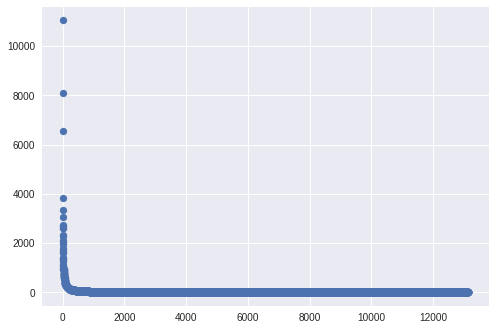

In [112]:
x_coordinate = [i for i in range(len(y)) ]
plt.scatter(x_coordinate, y)
plt.show()

In [0]:
res = count_x.toarray().sum(axis=0)

In [54]:
vectorizer.vocabulary_.get(u'really')

9387

In [45]:
res

array([57,  8,  1, ...,  1,  1,  1], dtype=int64)